## FiTech: Data Driven Credit Card Design

* Team-lead GitHub userid: rsm-roguchi
* Group name: Group 2
* Team member names:
    - Ryosuke Oguchi 
    - Rachel Wang
    - Jaqueline Vallejo
    - Qiyong Zhang

## Setup

Please complete this python notebook with your group by answering the questions in `fitech-msba.pdf`.

Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is a group assignment and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `model1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - model1.ipynb, question1.ipynb, etc.
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm

## Question answers

In [2]:
dat = pd.read_excel('data/exhibits.xlsx')
dat

,date,apr,fixed_var,annual_fee,visamc,nr_mailed,non_resp,resp,bk_score
0,April,16.8,Fixed,20,MC,167000,165467,1533,200
1,April,16.8,Fixed,0,MC,81000,78104,2896,200
2,April,19.8,Fixed,20,MC,143000,142410,590,200
3,April,19.8,Fixed,0,MC,100000,97948,2052,200
4,September,14.9,Fixed,20,Visa,177000,172671,4329,250
5,September,14.9,Variable,20,Visa,170000,166996,3004,250
6,September,16.8,Fixed,20,Visa,255000,252017,2983,250
7,September,19.8,Fixed,20,Visa,35000,34825,175,250
8,September,16.8,Fixed,0,Visa,65000,62484,2516,250
9,September,19.8,Fixed,0,Visa,95000,92885,2115,250


In [3]:
dat.dtypes

date           object
apr           float64
fixed_var      object
annual_fee      int64
visamc         object
nr_mailed       int64
non_resp        int64
resp            int64
bk_score        int64
dtype: object

In [4]:
dat_melt = pd.melt(
    dat,
    id_vars = ['apr', 'fixed_var', 'annual_fee', 'bk_score'],
    value_vars = ['resp', 'non_resp'],
    var_name='resp',
    value_name='freq'
)
dat_melt['resp_resp'] = rsm.ifelse(dat_melt.resp == 'resp', 1, 0)
dat_melt['apr'] = dat_melt['apr'].astype('category')
dat_melt['annual_fee'] = dat_melt['annual_fee'].astype('category')
dat_melt['bk_score'] = dat_melt['bk_score'].astype('category')
dat_melt

,apr,fixed_var,annual_fee,bk_score,resp,freq,resp_resp
0,16.8,Fixed,20,200,resp,1533,1
1,16.8,Fixed,0,200,resp,2896,1
2,19.8,Fixed,20,200,resp,590,1
3,19.8,Fixed,0,200,resp,2052,1
4,14.9,Fixed,20,250,resp,4329,1
5,14.9,Variable,20,250,resp,3004,1
6,16.8,Fixed,20,250,resp,2983,1
7,19.8,Fixed,20,250,resp,175,1
8,16.8,Fixed,0,250,resp,2516,1
9,19.8,Fixed,0,250,resp,2115,1


In [5]:
lr = rsm.model.logistic(
    data={'dat_melt': dat_melt},
    rvar='resp_resp', lev=1, evar=['apr', 'fixed_var', 'annual_fee', 'bk_score'],
    weights='freq'
)
lr.coef[1:].round(3)

,index,OR,OR%,coefficient,std.error,z.value,p.value,
1,apr[T.16.8],0.471,-52.872,-0.752,0.019,-39.875,0.0,***
2,apr[T.19.8],0.257,-74.292,-1.358,0.024,-57.254,0.0,***
3,fixed_var[T.Variable],0.741,-25.927,-0.300,0.021,-14.336,0.0,***
4,annual_fee[T.20],0.290,-71.039,-1.239,0.015,-84.443,0.0,***
5,bk_score[T.200],1.232,23.205,0.209,0.024,8.519,0.0,***
6,bk_score[T.250],1.425,42.492,0.354,0.019,18.388,0.0,***


In [6]:
lr.summary()

Logistic regression (GLM)
Data                 : dat_melt
Response variable    : resp_resp
Level                : 1
Explanatory variables: apr, fixed_var, annual_fee, bk_score
Weights used         : freq
Null hyp.: There is no effect of x on resp_resp
Alt. hyp.: There is an effect of x on resp_resp

                        OR     OR%  coefficient  std.error  z.value p.value     
Intercept            0.060  -94.0%       -2.809      0.016 -175.303  < .001  ***
apr[16.8]            0.471  -52.9%       -0.752      0.019  -39.875  < .001  ***
apr[19.8]            0.257  -74.3%       -1.358      0.024  -57.254  < .001  ***
fixed_var[Variable]  0.741  -25.9%       -0.300      0.021  -14.336  < .001  ***
annual_fee[20]       0.290  -71.0%       -1.239      0.015  -84.443  < .001  ***
bk_score[200]        1.232   23.2%        0.209      0.024    8.519  < .001  ***
bk_score[250]        1.425   42.5%        0.354      0.019   18.388  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '

To get an idea on how to approach how many individuals to target during out testing round, there must be fleshed out method using all the available historical data we have on hand. However, due to the structure of the historical data in exhibit 1, you must be very careful on how applicable it is to administer a full scale rollout campaign on this data. \
In general, the model does a mediocre job on separating out each credit card offering against various bk scores. Hence, this model will not do a great job in determining the predictive probability of a potential response. \
However, there are key flaws in the data that must be considered when evaluating why the model is not a good tool in predicting out predicted probability of response to an email.
* First is that the data is heavily imbalanced in terms of the fixed interested rate variable. All but two email solicitation designs utilize fixed interest rates; this can serve as an issue when viewing the correlation between independent variables.
* Moreover, the clear imbalance in the number of emails sent out per solicitation type will result in correlation between independent variables.

In [7]:
full_dat = rsm.table2data(dat_melt, 'freq')
ct = rsm.basics.cross_tabs({'dat': full_dat}, 'annual_fee', 'apr')
ct.summary(dec=3)


Cross-tabs
Data     : dat
Variables: annual_fee, apr
Null hyp : There is no association between annual_fee and apr
Alt. hyp : There is an association between annual_fee and apr

Observed:

apr            14.9     16.8     19.8      Total
annual_fee                                      
0            50,000  146,000  195,000    391,000
20          479,000  472,000  178,000  1,129,000
Total       529,000  618,000  373,000  1,520,000

Expected: (row total x column total) / total

apr                14.9         16.8         19.8        Total
annual_fee                                                    
0           136,078.289  158,972.368   95,949.342    391,000.0
20          392,921.711  459,027.632  277,050.658  1,129,000.0
Total         529,000.0    618,000.0    373,000.0  1,520,000.0

Chi-squared: 212397.241 df(2), p.value < .001
0.0% of cells have expected values below 5



Looking at the relationship between APR and Annual Fee, there is an apparent correlation between the two factors. This can be seen in the p value being less than 0.001, meaning you reject the null in favor of the alternative, saying there is not enough evidence that supports the fact there is no association between annual fee and APR.

In [8]:
ct = rsm.basics.cross_tabs({'dat': full_dat}, 'annual_fee', 'fixed_var')
ct.summary(dec=3)


Cross-tabs
Data     : dat
Variables: annual_fee, fixed_var
Null hyp : There is no association between annual_fee and fixed_var
Alt. hyp : There is an association between annual_fee and fixed_var

Observed:

fixed_var       Fixed Variable      Total
annual_fee                               
0             391,000        0    391,000
20            909,000  220,000  1,129,000
Total       1,300,000  220,000  1,520,000

Expected: (row total x column total) / total

fixed_var         Fixed     Variable        Total
annual_fee                                       
0           334,407.895   56,592.105    391,000.0
20          965,592.105  163,407.895  1,129,000.0
Total       1,300,000.0    220,000.0  1,520,000.0

Chi-squared: 89085.235 df(1), p.value < .001
0.0% of cells have expected values below 5



Looking at fixed variable interest rate and annual fee, there is another clear association between the two variables as the p value states that there is a correlation between the two independent variables.

In [9]:
ct = rsm.basics.cross_tabs({'dat': full_dat}, 'apr', 'fixed_var')
ct.summary(dec=3)


Cross-tabs
Data     : dat
Variables: apr, fixed_var
Null hyp : There is no association between apr and fixed_var
Alt. hyp : There is an association between apr and fixed_var

Observed:

fixed_var      Fixed Variable      Total
apr                                     
14.9         309,000  220,000    529,000
16.8         618,000        0    618,000
19.8         373,000        0    373,000
Total      1,300,000  220,000  1,520,000

Expected: (row total x column total) / total

fixed_var        Fixed    Variable        Total
apr                                            
14.9       452,434.211  76,565.789    529,000.0
16.8       528,552.632  89,447.368    618,000.0
19.8       319,013.158  53,986.842    373,000.0
Total      1,300,000.0   220,000.0  1,520,000.0

Chi-squared: 481882.216 df(2), p.value < .001
0.0% of cells have expected values below 5



As for the final combination, we attempt to see if there a clear relationship between APR and fixed variable. Again, similar to the other variables, we see that there is a clear association between the independent variables. This can be upheld through the fact that the p value here is smaller than 0.001 again.

In [10]:
dat_melt['pred_partial'] = lr.predict(dat_melt)['prediction']
dat_melt

,apr,fixed_var,annual_fee,bk_score,resp,freq,resp_resp,pred_partial
0,16.8,Fixed,20,200,resp,1533,1,0.010029
1,16.8,Fixed,0,200,resp,2896,1,0.033799
2,19.8,Fixed,20,200,resp,590,1,0.005496
3,19.8,Fixed,0,200,resp,2052,1,0.018725
4,14.9,Fixed,20,250,resp,4329,1,0.024258
5,14.9,Variable,20,250,resp,3004,1,0.018083
6,16.8,Fixed,20,250,resp,2983,1,0.011581
7,19.8,Fixed,20,250,resp,175,1,0.006351
8,16.8,Fixed,0,250,resp,2516,1,0.038884
9,19.8,Fixed,0,250,resp,2115,1,0.021593


In [11]:
dct = rsm.levels_list(dat_melt[['apr', 'fixed_var', 'annual_fee', 'bk_score']])
dct

{'apr': [16.8, 19.8, 14.9],
 'fixed_var': ['Fixed', 'Variable'],
 'annual_fee': [20, 0],
 'bk_score': [200, 250, 150]}

In [12]:
exhibit2 = pd.read_excel('data/exhibits.xlsx', sheet_name='exhibit2')
exhibit2

,offer,apr,fixed_var,annual_fee,clv150,clv200,clv250
0,1,14.9,Fixed,20,83,63,33
1,2,14.9,Variable,20,93,73,43
2,3,14.9,Fixed,0,52,32,2
3,4,14.9,Variable,0,62,42,12
4,5,16.8,Fixed,20,103,83,53
5,6,16.8,Variable,20,113,93,63
6,7,16.8,Fixed,0,72,52,22
7,8,16.8,Variable,0,82,62,32
8,9,19.8,Fixed,20,131,111,81
9,10,19.8,Variable,20,141,121,91


In [13]:
exhibit2_melt = pd.melt(
    exhibit2,
    id_vars=['offer', 'apr', 'fixed_var', 'annual_fee'],
    value_vars=['clv150', 'clv200', 'clv250'],
    var_name='clv_type',
    value_name='clv_value'
)
exhibit2_melt['clv_value'] = exhibit2_melt['clv_value'].astype('category')
clv_map = {'clv150': 150, 'clv200': 200, 'clv250': 250}
exhibit2_melt['clv_type'] = exhibit2_melt['clv_type'].map(clv_map)
exhibit2_melt = exhibit2_melt.rename(columns={'clv_type': 'bk_score'})
exhibit2_melt

,offer,apr,fixed_var,annual_fee,bk_score,clv_value
0,1,14.9,Fixed,20,150,83
1,2,14.9,Variable,20,150,93
2,3,14.9,Fixed,0,150,52
3,4,14.9,Variable,0,150,62
4,5,16.8,Fixed,20,150,103
5,6,16.8,Variable,20,150,113
6,7,16.8,Fixed,0,150,72
7,8,16.8,Variable,0,150,82
8,9,19.8,Fixed,20,150,131
9,10,19.8,Variable,20,150,141


In [14]:
exhibit2_melt['pred_all'] = lr.predict(exhibit2_melt)['prediction']
exhibit2_melt['expected_clv'] = exhibit2_melt['clv_value'].astype(int) * exhibit2_melt['pred_all']
exhibit2_melt.sort_values('expected_clv')

,offer,apr,fixed_var,annual_fee,bk_score,clv_value,pred_all,expected_clv
26,3,14.9,Fixed,0,250,2,0.079057,0.158115
33,10,19.8,Variable,20,250,91,0.004712,0.428798
9,10,19.8,Variable,20,150,141,0.003312,0.466929
21,10,19.8,Variable,20,200,121,0.004077,0.493303
32,9,19.8,Fixed,20,250,81,0.006351,0.514425
29,6,16.8,Variable,20,250,63,0.008604,0.542070
8,9,19.8,Fixed,20,150,131,0.004466,0.584981
20,9,19.8,Fixed,20,200,111,0.005496,0.610061
28,5,16.8,Fixed,20,250,53,0.011581,0.613799
5,6,16.8,Variable,20,150,113,0.006054,0.684100


In [15]:
exhibit2_melt.groupby(['apr', 'fixed_var', 'annual_fee'])['expected_clv'].mean().sort_values()

apr   fixed_var  annual_fee
19.8  Variable   20            0.463010
      Fixed      20            0.569822
16.8  Variable   20            0.639623
      Fixed      20            0.762091
14.9  Variable   20            1.036104
19.8  Variable   0             1.155701
14.9  Fixed      20            1.183210
19.8  Fixed      0             1.367600
16.8  Variable   0             1.395337
      Fixed      0             1.533595
14.9  Fixed      0             1.774641
      Variable   0             1.851609
Name: expected_clv, dtype: float64

CLV varies with BK score because higher BK scores indicate a greater risk of default. Customers with a BK score of 150 are more likely to make payments and generate revenue, while those with a BK score of 250 are at higher risk of default, reducing their CLV. Exhibit 2 shows that CLV decreases as BK score increases, reflecting the lower expected revenue from high-risk customers.

Higher APR cards generate more interest income, increasing CLV. Annual fees provide guaranteed revenue, making fee-based cards more profitable. Variable-rate cards shift interest rate risk to customers, further boosting CLV compared to fixed-rate cards. High-APR, fee-based, variable-rate products tend to have the highest CLVs, whereas low-APR, no-fee, fixed-rate cards have lower CLVs due to reduced revenue potential. Therefore, CLV also varies by product.

## Full Factorial Economics

In [16]:
exhibit2_melt = exhibit2_melt.sort_values(by='pred_all')
exhibit2_melt['pred_diffs'] = exhibit2_melt['pred_all'].diff()
exhibit2_melt['pred_all'].mean(), exhibit2_melt['pred_diffs'].mean()

(0.022806157559652915, 0.0021641687344617546)

In [17]:
exhibit2_melt

,offer,apr,fixed_var,annual_fee,bk_score,clv_value,pred_all,expected_clv,pred_diffs
9,10,19.8,Variable,20,150,141,0.003312,0.466929,NaN
21,10,19.8,Variable,20,200,121,0.004077,0.493303,0.000765
8,9,19.8,Fixed,20,150,131,0.004466,0.584981,0.000389
33,10,19.8,Variable,20,250,91,0.004712,0.428798,0.000247
20,9,19.8,Fixed,20,200,111,0.005496,0.610061,0.000784
5,6,16.8,Variable,20,150,113,0.006054,0.684100,0.000558
32,9,19.8,Fixed,20,250,81,0.006351,0.514425,0.000297
17,6,16.8,Variable,20,200,93,0.007448,0.692698,0.001097
4,5,16.8,Fixed,20,150,103,0.008156,0.840040,0.000707
29,6,16.8,Variable,20,250,63,0.008604,0.542070,0.000449


In [18]:
(exhibit2_melt['pred_all'].mean() + exhibit2_melt['pred_diffs'].mean()), (exhibit2_melt['pred_all'].mean()- exhibit2_melt['pred_diffs'].mean())

(0.02497032629411467, 0.02064198882519116)

### Benchmark

In [19]:
sample_size_full = 4000
fixed_cost = 10_000 + 800
solitication_cost_full = 11 * 1_000
total_emails_full = sample_size_full * 3 * 12
variable_cost_full = total_emails_full * 0.5
total_cost_full = fixed_cost + solitication_cost_full + variable_cost_full
total_cost_full

93800.0

As a benchmark, we can assume that we can use a 4000 sample size across all BK, credit card combination. However, these are under the assumptions that would like to test between 2 and 3 percent response rates. However, according to the average differences between close response rates and average response rates, 4000 targets per segment may be too small to discern a difference between each other. However, as for a cost perspective, we may assume that the firm may be willing to invest about 95000 dollars to test across all segments.

### Adjusted Probs

In [20]:
sample_size_full = 15000
fixed_cost = 10_000 + 800
solitication_cost_full = 11 * 1_000
total_emails_full = sample_size_full * 3 * 12
variable_cost_full = total_emails_full * 0.5
total_cost_full = fixed_cost + solitication_cost_full + variable_cost_full
total_cost_full

291800.0

As mentioned before, we expect that using a 4000 sample size is a naive way to discern between each segment. Hence, we will advocate for a 15000 sample across each segment. Of course, each segment may not need 15000 individuals, it will maximize the total information we can get, while minimizing the total number of targets used during test. Nevertheless, the cost breakdown indicates that it will require close to 300000 dollars to run this full experiment. This will not be economical as it will use up many of the targets before the implementation of the rollout campaign.

## Partial Factorial

In [21]:
exhibit2_melt.sort_values('expected_clv')

,offer,apr,fixed_var,annual_fee,bk_score,clv_value,pred_all,expected_clv,pred_diffs
26,3,14.9,Fixed,0,250,2,0.079057,0.158115,0.009961
33,10,19.8,Variable,20,250,91,0.004712,0.428798,0.000247
9,10,19.8,Variable,20,150,141,0.003312,0.466929,NaN
21,10,19.8,Variable,20,200,121,0.004077,0.493303,0.000765
32,9,19.8,Fixed,20,250,81,0.006351,0.514425,0.000297
29,6,16.8,Variable,20,250,63,0.008604,0.542070,0.000449
8,9,19.8,Fixed,20,150,131,0.004466,0.584981,0.000389
20,9,19.8,Fixed,20,200,111,0.005496,0.610061,0.000784
28,5,16.8,Fixed,20,250,53,0.011581,0.613799,0.000239
5,6,16.8,Variable,20,150,113,0.006054,0.684100,0.000558


As a solutions to the problem provided above, we will use partial factorial to be selective yet informative of the offerings that are going to be put out. However, there are key assumptions that must be made in order to use these partial factorial designs.
* The D-efficiency is high enough; we will use a threshold of 0.8
* The Variables are balance; i.e. each categorical variable frequency is balanced unlike the historical data
* The variables in question are not correlated; as seen before, there were clear associations between the data, so you need to ensure correlation does not occur to not create imbalances in predictions

### 1234 Seed

In [22]:
partial_factorial_1234 = pd.read_csv('data/part_factorial_1234.csv')
partial_factorial_1234 = pd.merge(exhibit2_melt, partial_factorial_1234, on=['apr', 'fixed_var', 'annual_fee'])
partial_factorial_1234 = partial_factorial_1234[['apr', 'fixed_var', 'annual_fee', 'bk_score', 'expected_clv', 'pred_all', 'offer']]
partial_factorial_1234 = partial_factorial_1234.sort_values('pred_all')
partial_factorial_1234['pred_diff'] = partial_factorial_1234['pred_all'].diff()
partial_factorial_1234.sort_values('expected_clv')

,apr,fixed_var,annual_fee,bk_score,expected_clv,pred_all,offer,pred_diff
17,14.9,Fixed,0,250,0.158115,0.079057,3,0.009961
3,19.8,Fixed,20,250,0.514425,0.006351,9,0.000297
5,16.8,Variable,20,250,0.542070,0.008604,6,0.001156
0,19.8,Fixed,20,150,0.584981,0.004466,9,NaN
1,19.8,Fixed,20,200,0.610061,0.005496,9,0.001031
2,16.8,Variable,20,150,0.684100,0.006054,6,0.000558
4,16.8,Variable,20,200,0.692698,0.007448,6,0.001097
11,14.9,Variable,20,250,0.777553,0.018083,2,0.001998
14,16.8,Fixed,0,250,0.855442,0.038884,7,0.005085
10,19.8,Variable,0,250,0.965060,0.016084,12,0.000411


In [23]:
partial_factorial_1234['pred_all'].mean(), partial_factorial_1234['expected_clv'].mean()

(0.023975827686941984, 1.1182475459416539)

In [24]:
partial_factorial_1234['pred_all'].mean() + partial_factorial_1234['pred_diff'].mean()

0.028363590024133623

### 19 Seed

In [25]:
partial_factorial_19 = pd.read_csv('data/part_factorial_19.csv')
partial_factorial_19 = pd.merge(exhibit2_melt, partial_factorial_19, on=['apr', 'fixed_var', 'annual_fee',])
partial_factorial_19 = partial_factorial_19[['apr', 'fixed_var', 'annual_fee', 'expected_clv', 'pred_all', 'offer']]
partial_factorial_19 = partial_factorial_19.sort_values('pred_all')
partial_factorial_19['pred_diff'] = partial_factorial_19['pred_all'].diff()
partial_factorial_19

,apr,fixed_var,annual_fee,expected_clv,pred_all,offer,pred_diff
0,19.8,Variable,20,0.466929,0.003312,10,NaN
1,19.8,Variable,20,0.493303,0.004077,10,0.000765
2,19.8,Variable,20,0.428798,0.004712,10,0.000635
3,16.8,Fixed,20,0.840040,0.008156,5,0.003444
4,16.8,Fixed,20,0.832433,0.010029,5,0.001874
5,16.8,Fixed,20,0.613799,0.011581,5,0.001552
6,14.9,Variable,20,1.186595,0.012759,2,0.001178
7,19.8,Fixed,0,1.525182,0.015252,11,0.002493
8,14.9,Variable,20,1.144164,0.015673,2,0.000422
9,14.9,Variable,20,0.777553,0.018083,2,0.002409


In [26]:
partial_factorial_19['pred_all'].mean(), partial_factorial_19['expected_clv'].mean()

(0.023548718452299486, 1.1331304911341809)

### 172110 Seed

In [27]:
partial_factorial_172110 = pd.read_csv('data/part_factorial_172110.csv')
partial_factorial_172110 = pd.merge(exhibit2_melt, partial_factorial_172110, on=['apr', 'fixed_var', 'annual_fee'])
partial_factorial_172110 = partial_factorial_172110[['apr', 'fixed_var', 'annual_fee', 'expected_clv', 'pred_all', 'offer']]
partial_factorial_172110 = partial_factorial_172110.sort_values('pred_all')
partial_factorial_172110['pred_diff'] = partial_factorial_172110['pred_all'].diff()
partial_factorial_172110.sort_values('expected_clv')

,apr,fixed_var,annual_fee,expected_clv,pred_all,offer,pred_diff
2,19.8,Variable,20,0.428798,0.004712,10,0.000635
0,19.8,Variable,20,0.466929,0.003312,10,NaN
1,19.8,Variable,20,0.493303,0.004077,10,0.000765
5,16.8,Fixed,20,0.613799,0.011581,5,0.001552
17,14.9,Variable,0,0.717426,0.059786,4,0.007670
12,14.9,Fixed,20,0.800528,0.024258,1,0.002666
4,16.8,Fixed,20,0.832433,0.010029,5,0.001874
3,16.8,Fixed,20,0.840040,0.008156,5,0.003444
14,16.8,Variable,0,0.931059,0.029096,8,0.003839
11,19.8,Fixed,0,1.079634,0.021593,11,0.000549


In [28]:
partial_factorial_172110['pred_all'].mean(),  partial_factorial_172110['expected_clv'].mean()

(0.021636487432363852, 1.1704761452327344)

In [29]:
partial_factorial_172110['pred_all'].mean() + partial_factorial_172110['pred_diff'].mean(), partial_factorial_172110['pred_all'].mean() - partial_factorial_172110['pred_diff'].mean()

(0.02495848511289301, 0.018314489751834695)

In [30]:
sample_size_172110 = 9000
fixed_cost = 10_000 + 800
solitication_cost_172110 = (partial_factorial_172110['offer'].nunique()-1) * 1_000
total_emails_172110 = sample_size_172110 * partial_factorial_172110.shape[0]
variable_cost_172110 = total_emails_172110 * 0.5
total_cost_172110 = fixed_cost + solitication_cost_172110 + variable_cost_172110
total_cost_172110

96800.0

Here, we have developed three combinations of partial factorials that uphold the assumptions from above. Across each design, we are looking for three features:
* The average response rate
* The average difference in close response rates
* The average CLV

Using these features, we can select out the best partial factorial design that will net us out the highest profit in our testing scheme. In general, there are some CLV observations from above that need to be considered. "Good" credit cards for smart spenders will have lower CLVs, so it is not informative to test on these individuals. Overall, should be choosing the highest expected CLV as the test subjects as it makes more sense as a credit card company to have a consumer base that will give us more revenue.

# Round 2

In [31]:
experiment_dat = pd.read_csv('data/round1-results.csv')
experiment_dat['non_resp'] = experiment_dat['nr_emailed'] - experiment_dat['resp']
experiment_dat

,offer,apr,fixed_var,annual_fee,bk_score,nr_emailed,resp,non_resp
0,1,14.9,Fixed,20,150,9000,140,8860
1,4,14.9,Variable,0,150,9000,313,8687
2,5,16.8,Fixed,20,150,9000,38,8962
3,8,16.8,Variable,0,150,9000,128,8872
4,10,19.8,Variable,20,150,9000,27,8973
5,11,19.8,Fixed,0,150,9000,131,8869
6,1,14.9,Fixed,20,200,9000,200,8800
7,4,14.9,Variable,0,200,9000,398,8602
8,5,16.8,Fixed,20,200,9000,61,8939
9,8,16.8,Variable,0,200,9000,189,8811


#### Account Opening Trends for Different BK Scores

Customers with a BK score of 150 are generally more likely to respond because their lower credit score suggests that banks might assess them as lower risk and more eligible for credit card approvals.

Customers with a BK score of 250 tend to have a lower account opening rate, indicating a higher perceived default risk. Alternatively, banks might offer them less attractive credit card deals, reducing their incentive to apply.
#### Impact of APR and Annual Fees
A lower APR of 14.9% appears to result in a higher account opening rate.
For example, 14.9% APR, Variable, No Annual Fee had a relatively high response count (resp = 313).

Conversely, a higher APR of 19.8% seems less attractive to customers.
The 19.8% APR, Variable, $20 Annual Fee had the lowest response rate (resp = 27).

Lower APR & lower annual fee products generally exhibit better market appeal.
#### Fixed vs. Variable Interest Rate Preferences
Fixed-rate (Fixed) products tend to have a better response rate compared to variable-rate (Variable) products.
For instance, 14.9% Fixed, $20 Annual Fee (resp = 140) performed well, though slightly lower than 14.9% Variable, No Annual Fee (resp = 313).

This suggests that customers generally prefer fixed-rate products, likely due to the stability they offer.

Variable-rate products may deter some customers as their rates fluctuate with the market, introducing uncertainty.


In [32]:
exp_melt = pd.melt(
    experiment_dat,
    id_vars = ['apr', 'fixed_var', 'annual_fee', 'bk_score'],
    value_vars = ['resp', 'non_resp'],
    var_name='resp',
    value_name='freq'
)
exp_melt['resp_resp'] = rsm.ifelse(exp_melt.resp == 'resp', 1, 0)
exp_melt['apr'] = exp_melt['apr'].astype('category')
exp_melt['annual_fee'] = exp_melt['annual_fee'].astype('category')
exp_melt['bk_score'] = exp_melt['bk_score'].astype('category')
exp_melt

,apr,fixed_var,annual_fee,bk_score,resp,freq,resp_resp
0,14.9,Fixed,20,150,resp,140,1
1,14.9,Variable,0,150,resp,313,1
2,16.8,Fixed,20,150,resp,38,1
3,16.8,Variable,0,150,resp,128,1
4,19.8,Variable,20,150,resp,27,1
5,19.8,Fixed,0,150,resp,131,1
6,14.9,Fixed,20,200,resp,200,1
7,14.9,Variable,0,200,resp,398,1
8,16.8,Fixed,20,200,resp,61,1
9,16.8,Variable,0,200,resp,189,1


#### This Data Reshaping step above enables Comparative Analysis Across Different Credit Card Offers

By restructuring responses in a long format, we can easily compare response rates between different product offers.
Example: Does a fixed APR of 14.9% with no annual fee attract more customers than a variable APR of 19.8%?

#### And it Prepares Data for Predictive Modeling
The binary variable (resp_resp = 1 or 0) allows us to train a logistic regression model as follows.

In [33]:
lr2 = rsm.model.logistic(
    data={'experiment_data': exp_melt},
    rvar='resp_resp', lev=1, evar=['apr', 'fixed_var', 'annual_fee', 'bk_score'],
    weights='freq'
)
lr2.coef[1:].round(3)

,index,OR,OR%,coefficient,std.error,z.value,p.value,
1,apr[T.16.8],0.372,-62.834,-0.990,0.046,-21.669,0.0,***
2,apr[T.19.8],0.231,-76.943,-1.467,0.063,-23.276,0.0,***
3,fixed_var[T.Variable],0.785,-21.528,-0.242,0.062,-3.927,0.0,***
4,annual_fee[T.20],0.313,-68.739,-1.163,0.062,-18.837,0.0,***
5,bk_score[T.200],1.276,27.572,0.244,0.049,5.010,0.0,***
6,bk_score[T.250],1.523,52.252,0.420,0.047,8.956,0.0,***


OR (Odds Ratio): Represents the relative likelihood of response (account opening). A value greater than 1 indicates a positive impact, while a value less than 1 indicates a negative impact.

OR%: Converted to percentage change, indicating the change in account opening probability compared to the baseline group

### Variable Impact Analysis
#### 1. APR (Annual Percentage Rate)
APR = 16.8% (OR = 0.372, -62.83%)
The account opening probability is 62.83% lower compared to the baseline group (APR 14.9%).

APR = 19.8% (OR = 0.231, -76.94%)
The account opening probability is 76.94% lower than for APR 14.9%, indicating that higher APR leads to a significantly lower response rate.

Conclusion: Higher APRs (16.8% and 19.8%) significantly reduce account opening rates, suggesting that customers prefer lower interest rate credit cards.

#### 2. Fixed vs. Variable Interest Rate
Variable Rate (OR = 0.785, -21.53%)
The probability of account opening is 21.53% lower for variable-rate cards compared to fixed-rate cards.

Conclusion: Customers prefer fixed-rate credit cards, likely because they offer more stability, whereas variable rates introduce uncertainty.

#### 3. Annual Fee
Annual Fee = $20 (OR = 0.313, -68.73%)
Credit cards with a $20 annual fee have a 68.73% lower probability of account opening compared to no-fee cards.

Conclusion: The annual fee is a significant negative factor in account opening decisions. Customers tend to prefer credit cards with no annual fee.

#### 4. BK Score (Credit Score)
BK Score = 200 (OR = 1.276, +27.57%)
Compared to BK Score 150, the probability of account opening increases by 27.57%.

BK Score = 250 (OR = 1.523, +52.52%)
Compared to BK Score 150, the probability of account opening increases by 52.52%.

Conclusion: Customers with higher BK scores (200 or 250) are more likely to open accounts, suggesting that that these customers are more interested in credit card offers.

In [34]:
lr2.summary()

Logistic regression (GLM)
Data                 : experiment_data
Response variable    : resp_resp
Level                : 1
Explanatory variables: apr, fixed_var, annual_fee, bk_score
Weights used         : freq
Null hyp.: There is no effect of x on resp_resp
Alt. hyp.: There is an effect of x on resp_resp

                        OR     OR%  coefficient  std.error  z.value p.value     
Intercept            0.049  -95.1%       -3.010      0.070  -42.839  < .001  ***
apr[16.8]            0.372  -62.8%       -0.990      0.046  -21.669  < .001  ***
apr[19.8]            0.231  -76.9%       -1.467      0.063  -23.276  < .001  ***
fixed_var[Variable]  0.785  -21.5%       -0.242      0.062   -3.927  < .001  ***
annual_fee[20]       0.313  -68.7%       -1.163      0.062  -18.837  < .001  ***
bk_score[200]        1.276   27.6%        0.244      0.049    5.010  < .001  ***
bk_score[250]        1.523   52.3%        0.420      0.047    8.956  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*'

After developing out our test, we need to develop out a model that can better predict out the expected probability of a response rate of an email solicitation. Overall, we have remedied the issues that the historical data has presented by incorporating the partial factorial design assumptions into the data and we kept all observations consistent across the testing scheme to ensure there is no inherent weighting of certain independent variables over another. As a result, we see an improvement in AUC score as the the model is doing a better job on discerning between the various segments. Although there is a slight concern that the unseen segments may not be predicted out incorrectly, but due to the balanced nature of the data, these issues should remedy themselves.

In [35]:
exhibit2_melt['pred_all_exp'] = lr2.predict(exhibit2_melt)['prediction']
exhibit2_melt['expected_clv_exp'] = exhibit2_melt['clv_value'].astype(int) * exhibit2_melt['pred_all_exp']
exhibit2_melt.sort_values('expected_clv_exp')

,offer,apr,fixed_var,annual_fee,bk_score,clv_value,pred_all,expected_clv,pred_diffs,pred_all_exp,expected_clv_exp
26,3,14.9,Fixed,0,250,2,0.079057,0.158115,0.009961,0.069835,0.139669
33,10,19.8,Variable,20,250,91,0.004712,0.428798,0.000247,0.004229,0.384802
9,10,19.8,Variable,20,150,141,0.003312,0.466929,NaN,0.002781,0.392177
29,6,16.8,Variable,20,250,63,0.008604,0.542070,0.000449,0.006799,0.428312
21,10,19.8,Variable,20,200,121,0.004077,0.493303,0.000765,0.003546,0.429014
32,9,19.8,Fixed,20,250,81,0.006351,0.514425,0.000297,0.005382,0.435977
28,5,16.8,Fixed,20,250,53,0.011581,0.613799,0.000239,0.008648,0.458323
8,9,19.8,Fixed,20,150,131,0.004466,0.584981,0.000389,0.003542,0.463969
20,9,19.8,Fixed,20,200,111,0.005496,0.610061,0.000784,0.004514,0.501040
5,6,16.8,Variable,20,150,113,0.006054,0.684100,0.000558,0.004476,0.505765


In [36]:
temp_dat = pd.read_csv('data/round1-results.csv')
emails_left = 250000 - temp_dat.groupby('bk_score')['nr_emailed'].sum().iloc[0]
emails_left

196000

In [37]:
bk_scores = exhibit2_melt['bk_score'].unique()

# Create a new DataFrame for optimized email allocation
email_allocation_profit = []

# Optimize allocation per BK Score category
for bk_score in bk_scores:
    # Filter for the current BK score group
    bk_df = exhibit2_melt[exhibit2_melt["bk_score"] == bk_score].copy()

    # Normalize profit contribution within this BK Score category
    total_expected_profit = bk_df["expected_clv_exp"].sum()
    if total_expected_profit > 0:
        bk_df["clv_weight"] = bk_df["expected_clv_exp"] / total_expected_profit
    else:
        bk_df["clv_weight"] = 1 / len(bk_df)  # Equal distribution if all are zero

    # Allocate emails based on profit weight
    bk_df["emails_allocated"] = (bk_df["clv_weight"] * emails_left).astype(int)

    # Store allocation in the final DataFrame
    temp_df = bk_df[["offer", "emails_allocated"]].copy()
    temp_df["bk_score"] = bk_score
    temp_df.columns = ["offer", "nr_emails", "bk_score"]

    email_allocation_profit.append(temp_df)

# Concatenate all results
email_allocation_profit = pd.concat(email_allocation_profit, ignore_index=True)

# Sort for better readability
email_allocation_profit


,offer,nr_emails,bk_score
0,10,5639,150
1,9,6672,150
2,6,7273,150
3,5,8438,150
4,12,13989,150
5,2,15985,150
6,11,16167,150
7,1,18120,150
8,8,16719,150
9,7,18635,150


In [38]:
final_df = pd.pivot_table(email_allocation_profit, values='nr_emails', columns='bk_score', index='offer')
final_df

bk_score,150,200,250
offer,,,
1,18120.0,18724.0,21228.0
2,15985.0,17096.0,21814.0
3,35142.0,29186.0,3918.0
4,33216.0,30448.0,18728.0
5,8438.0,9281.0,12857.0
6,7273.0,8173.0,12015.0
7,18635.0,18308.0,16753.0
8,16719.0,17214.0,19234.0
9,6672.0,7721.0,12230.0


In [39]:
pd.pivot_table(exhibit2_melt, values='expected_clv_exp', index='offer', columns='bk_score')

bk_score,150,200,250
offer,,,
1,1.260049,1.215043,0.756755
2,1.111547,1.109417,0.777630
3,2.443693,1.893904,0.139669
4,2.309750,1.975787,0.667645
5,0.586760,0.602248,0.458323
6,0.505765,0.530363,0.428312
7,1.295819,1.188013,0.597218
8,1.162587,1.117029,0.685677
9,0.463969,0.501040,0.435977


In [40]:
exhibit2[['offer', 'clv150', 'clv200', 'clv250']]

,offer,clv150,clv200,clv250
0,1,83,63,33
1,2,93,73,43
2,3,52,32,2
3,4,62,42,12
4,5,103,83,53
5,6,113,93,63
6,7,72,52,22
7,8,82,62,32
8,9,131,111,81
9,10,141,121,91


To determine out the best allocation for the rollout scheme, we took a weighted average approach across expected customer lifetime values. This reflects the probability and greatest potential profit targets across each card and bk score combination. As seen relative to exhibit 2, we can see upward trends in the number of offers sent out when the expected CLV is higher in a particular bk score group. This means the allocation using weight average is working as intended, as more offers are being sent out to better targets.

In [41]:
exhibit2_melt = pd.merge(exhibit2_melt.copy(), email_allocation_profit, on=['offer', 'bk_score'])
exhibit2_melt['exp_clv_tot'] = exhibit2_melt['nr_emails'] * exhibit2_melt['expected_clv_exp']
total_clv = exhibit2_melt['exp_clv_tot'].sum()
total_clv

671470.6092800791

In [42]:
fixed_cost = 10_000 + 800
solitication_cost = 11 * 1_000
total_emails = emails_left * 3
variable_cost = total_emails * 0.5
total_cost = fixed_cost + solitication_cost + variable_cost
total_cost

315800.0

In [43]:
total_clv - total_cost

355670.60928007914

In [44]:
full_final = pd.merge(exhibit2[['apr','fixed_var', 'annual_fee', 'offer']], final_df.copy(), on='offer')
full_final

,apr,fixed_var,annual_fee,offer,150,200,250
0,14.9,Fixed,20,1,18120.0,18724.0,21228.0
1,14.9,Variable,20,2,15985.0,17096.0,21814.0
2,14.9,Fixed,0,3,35142.0,29186.0,3918.0
3,14.9,Variable,0,4,33216.0,30448.0,18728.0
4,16.8,Fixed,20,5,8438.0,9281.0,12857.0
5,16.8,Variable,20,6,7273.0,8173.0,12015.0
6,16.8,Fixed,0,7,18635.0,18308.0,16753.0
7,16.8,Variable,0,8,16719.0,17214.0,19234.0
8,19.8,Fixed,20,9,6672.0,7721.0,12230.0
9,19.8,Variable,20,10,5639.0,6611.0,10794.0


In [45]:
full_final[[150, 200, 250]].sum()

150    195995.0
200    195996.0
250    195995.0
dtype: float64

# Q1

Customer Lifetime Value (CLV) varies with BK score because a customer’s creditworthiness directly impacts their likelihood of defaulting and their long-term profitability for the bank. Customers with lower BK scores (e.g., 150) are considered lower risk, meaning they are more likely to make consistent payments, maintain longer account tenures, and generate sustained revenue through interest charges and fees. In contrast, customers with higher BK scores (e.g., 250) are more likely to default, leading to charge-offs and reduced overall profitability. Our analysis confirms that expected CLV consistently decreases as BK score increases, aligning with Exhibit 2, which shows lower CLV estimates for higher BK score groups. The bank strategically prioritizes lower-risk customers since they provide greater long-term value and lower default risk, making them more attractive for credit card offers.

CLV also varies by product due to differences in APR, annual fees, and interest rate structures, which influence both customer adoption and long-term profitability. Higher APR products generate more revenue through interest payments, but our model reveals that they have significantly lower response rates, reducing their overall profitability. Similarly, products with annual fees tend to have lower CLV because fewer customers opt for them, preferring no-fee alternatives. Fixed-rate products typically result in higher CLV, as customers prefer predictable payments, leading to higher retention and greater long-term revenue. Our analysis of expected CLV by product shows that offers with low APR, no annual fee, and fixed interest rates consistently yield the highest CLV, confirming the patterns observed in Exhibit 2. This suggests that the most profitable strategy involves promoting stable, low-cost credit card products that attract more customers while maintaining long-term profitability.

# Q2

An overrepresentation of fixed-rate cards can lead to biased model predictions. Since most of the training data consists of fixed-rate cards, the model primarily learns from their behavior, limiting its ability to make accurate predictions for variable-rate cards. This bias results in the model being skewed toward fixed-rate products, which have lower CLVs compared to variable-rate products. Consequently, the model may undervalue variable-rate cards, leading to suboptimal email allocations and missed opportunities to promote higher-profit products.

The chi-square test results confirm this imbalance, particularly in the association between APR and fixed/variable rates, where higher APR cards are overwhelmingly fixed-rate. This suggests that past marketing efforts have not offered enough variable-rate cards at higher APRs, further skewing response rate predictions. Because the model has fewer data points for variable-rate products, it is less able to generalize their expected performance.

# Q3

In [46]:
experiment_dat['resp_rate'] = experiment_dat['resp'] / experiment_dat['nr_emailed']
experiment_dat.groupby('offer')['resp_rate'].mean().reset_index().sort_values('resp_rate', ascending=False)

,offer,resp_rate
1,4,0.045296
0,1,0.020481
3,8,0.019222
5,11,0.014185
2,5,0.005852
4,10,0.003519


In [47]:
total_resp = experiment_dat.groupby('offer')['resp'].mean().reset_index().sort_values('resp', ascending=False)
total_resp.columns = ['offer', 'total_resp']
experiment_dat = experiment_dat.merge(total_resp, on='offer')
experiment_dat

,offer,apr,fixed_var,annual_fee,bk_score,nr_emailed,resp,non_resp,resp_rate,total_resp
0,1,14.9,Fixed,20,150,9000,140,8860,0.015556,184.333333
1,4,14.9,Variable,0,150,9000,313,8687,0.034778,407.666667
2,5,16.8,Fixed,20,150,9000,38,8962,0.004222,52.666667
3,8,16.8,Variable,0,150,9000,128,8872,0.014222,173.000000
4,10,19.8,Variable,20,150,9000,27,8973,0.003000,31.666667
5,11,19.8,Fixed,0,150,9000,131,8869,0.014556,127.666667
6,1,14.9,Fixed,20,200,9000,200,8800,0.022222,184.333333
7,4,14.9,Variable,0,200,9000,398,8602,0.044222,407.666667
8,5,16.8,Fixed,20,200,9000,61,8939,0.006778,52.666667
9,8,16.8,Variable,0,200,9000,189,8811,0.021000,173.000000


In [48]:
experiment2_dat = pd.read_csv('data/round2-results.csv')
experiment2_dat['resp_rate'] = experiment2_dat['resp'] / experiment2_dat['nr_emailed']
experiment2_dat.groupby('offer')['resp'].mean().reset_index().sort_values('resp', ascending=False)

,offer,resp
3,4,1246.000000
2,3,1002.333333
0,1,384.666667
6,7,348.000000
7,8,319.000000
10,11,294.333333
11,12,253.666667
1,2,249.333333
4,5,61.666667
5,6,40.666667


In [49]:
total_resp_2 = experiment2_dat.groupby('offer')['resp'].mean().reset_index().sort_values('resp', ascending=False)
total_resp_2.columns = ['offer', 'total_resp']
experiment2_dat = experiment2_dat.merge(total_resp_2, on='offer')
experiment2_dat

,offer,apr,fixed_var,annual_fee,bk_score,nr_emailed,resp,resp_rate,total_resp
0,1,14.9,Fixed,20,150,18120,258,0.014238,384.666667
1,2,14.9,Variable,20,150,15985,154,0.009634,249.333333
2,3,14.9,Fixed,0,150,35147,1330,0.037841,1002.333333
3,4,14.9,Variable,0,150,33216,1192,0.035886,1246.000000
4,5,16.8,Fixed,20,150,8438,42,0.004977,61.666667
5,6,16.8,Variable,20,150,7273,18,0.002475,40.666667
6,7,16.8,Fixed,0,150,18635,269,0.014435,348.000000
7,8,16.8,Variable,0,150,16719,235,0.014056,319.000000
8,9,19.8,Fixed,20,150,6672,15,0.002248,30.000000
9,10,19.8,Variable,20,150,5639,14,0.002483,23.000000


There is no single “best product” that will be preferred by all customers. Customer preferences vary based on factors such as APR, fixed vs. variable rates, annual fees, and BK score.

If we define “best” by the highest response rate (customer preference), then Offer 4 (14.9% APR, Variable, $0 Fee) was the most accepted across all BK scores.

If we define “best” by profitability (balancing response rate and CLV), then Offer 1 (14.9% APR, Fixed, $20 Fee) was likely the best choice, as it had a good response rate while generating higher revenue per acquired customer.

Since different customers prioritize different aspects, no single product dominates across all factors.

# Q4

In round 1, we focused on testing multiple product variations by distributing emails evenly across different APR levels, fixed/variable rates, and annual fees. Instead of sending emails to all 12 products, we selected a subset of products that covered a mix of offers. This ensured that we could analyze customer response patterns across different BK score groups while keeping testing costs manageable. By keeping the test volume at 9,000 per BK score per product, we were able to collect enough data to make decisions for the full rollout.

After analyzing the response rates and profitability from Round 1, we reallocated emails in round 2 to products that performed best in terms of both response rate and CLV. Instead of spreading emails across multiple untested products, we focused more emails on the most profitable offers, which were:

•	Low-APR, Fixed-Rate, Fee-Based Products (Product 1: 14.9% APR, Fixed, $20 Fee)

•	14.9% APR Variable Rate & No-Fee Products (Product 4 also performed well)

We significantly reduced emails to underperforming products like high-APR (19.8%) products, which had low response rates.

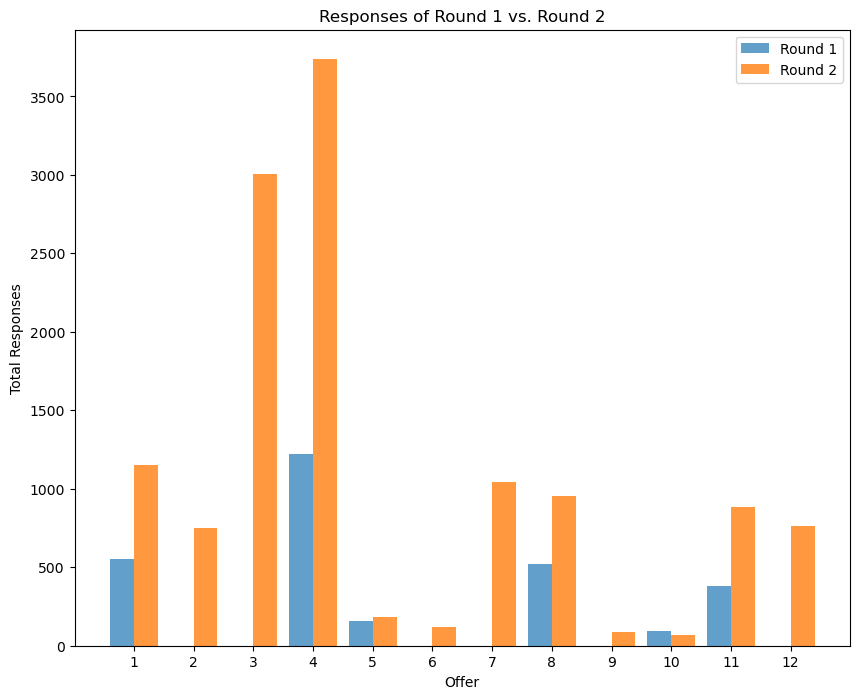

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Group total responses per offer for each round
total_resp_1 = experiment_dat.groupby('offer')['total_resp'].sum()
total_resp_2 = experiment2_dat.groupby('offer')['total_resp'].sum()

# Ensure all offers exist in both rounds (fill missing offers in Round 1 with 0)
all_offers = sorted(set(total_resp_1.index).union(set(total_resp_2.index)))
total_resp_1 = total_resp_1.reindex(all_offers, fill_value=0)
total_resp_2 = total_resp_2.reindex(all_offers, fill_value=0)

# Define x positions for offers
x_positions = np.arange(len(all_offers))  # Ensure x positions match the number of offers
bar_width = 0.4  # Adjust bar width
shift = -0.1  # Small shift left

# Create the figure
plt.figure(figsize=(10, 8))

# Move both bars slightly left while keeping them aligned
plt.bar(x_positions + shift - bar_width/2, total_resp_1, width=bar_width, label='Round 1', color='tab:blue', alpha=0.7)
plt.bar(x_positions + shift + bar_width/2, total_resp_2, width=bar_width, label='Round 2', color='tab:orange', alpha=0.8)

# Formatting labels
plt.xlabel("Offer")
plt.ylabel("Total Responses")
plt.title("Responses of Round 1 vs. Round 2")

# Shift x-ticks to match the new bar positions
plt.xticks(x_positions + shift, all_offers, rotation=0)

# Add the legend
plt.legend()

# Show the graph
plt.show()

Although our strategy was effective, there are areas for improvement. First, we could better balance response rate and profitability by prioritizing offers using a Response Rate × CLV approach instead of just response volume. Second, earlier testing of no-fee fixed-rate products, like Offer 3, would have provided better data for Round 2. Additionally, eliminating weak products, such as high-APR offers, sooner would have allowed us to focus resources on top-performing options. Lastly, a more targeted strategy by BK score would have increased profitability, as low-risk customers were more willing to accept fees, while high-risk customers preferred no-fee products.